Solving linear variational problem.
Object cannot be plotted directly, projecting to piecewise linears.


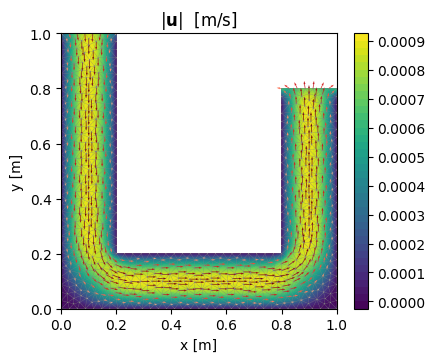

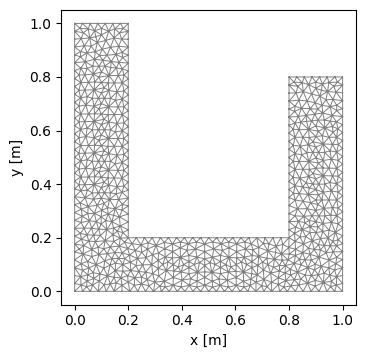

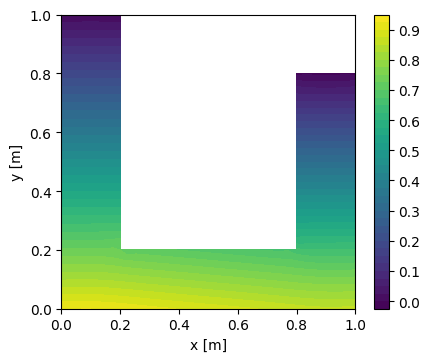

In [2]:
from dolfin import * 
import matplotlib.pyplot as plt # for plotting

## Constants

fmag = 1
eta  = 1 # dynamic viscocity of fluid

## Mesh

mesh = Mesh('mesh_u.xml')

## Function spaces
    
degree = 1
U = VectorElement("Lagrange", mesh.ufl_cell(), degree+1)
P = FiniteElement("Lagrange", mesh.ufl_cell(), degree) 
Wele = MixedElement([U,P])
W = FunctionSpace(mesh, Wele) 
(u, p) = TrialFunctions(W) # the unknowns
(v, q) = TestFunctions(W) # the weight functions

## Weak Stokes problem

fvec = Constant((0,-fmag)) # Gravity force vector
def eps(u): 
    return sym(grad(u)) 
a0 = eta*inner(eps(u), eps(v))*dx # Recall "* dx " => integral
a = a0 - p*div(v)*dx + q*div(u)*dx
L = dot(fvec,v)*dx 
   
## Boundary conditions

def bnd_W(x, on_boundary): 
    return on_boundary and not (near(x[1], 1) and x[0]<0.5) and not (near(x[1], 0.8) and x[0]>0.5)

bc = []
bc += [DirichletBC(W.sub(0), (0,0), bnd_W)]

## Solve problem

wsol = Function(W) 
solve(a==L, wsol, bc)

(usol,psol) = wsol.split(deepcopy=True) 

## Plot fluid speed

import matplotlib as mpl
cmap = mpl.cm.Reds

s = 0.55
figsize=(s*8.3,s*6.8)
plt.figure(figsize=figsize)
speed = sqrt(dot(usol,usol))
h = plot(speed, title='|$\mathbf{u}$|  [m/s]');
plt.colorbar(h);
plot(usol, cmap=cmap)
plot(mesh, lw=0.2)
plt.tight_layout(pad=2)
plt.xlabel('x [m]');
plt.ylabel('y [m]');
#plt.savefig('pipe_vel.png',dpi=300)
plt.show()

plt.figure(figsize=figsize)
h=plot(mesh, lw=0.7)
plt.tight_layout(pad=2)
plt.xlabel('x [m]');
plt.ylabel('y [m]');
#plt.savefig('pipe_mesh.png',dpi=300)
plt.show()

plt.figure(figsize=figsize)
h=plot(psol)
plt.colorbar(h);
plt.tight_layout(pad=2)
plt.xlabel('x [m]');
plt.ylabel('y [m]');
#plt.savefig('pipe_pressure.png',dpi=300)
plt.show()